In [55]:
import pandas as pd
import glob
import os

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [56]:
path = r'tahillar'                    
all_files = glob.glob(os.path.join(path, '*.csv'))    
dfList = [pd.read_csv(f,  sep="|", encoding='utf-8', header=3)
          .rename(columns={"Unnamed: 1" : "İl", "Unnamed: 2" : "Tarih"}) for f in all_files]

In [57]:
for df in dfList:
    df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], axis=1, inplace=True)
    df.dropna(axis=0, how='all', inplace=True)
    df['İl'].ffill(inplace=True)

In [58]:
data = pd.merge(dfList[0], dfList[1], how='outer', on=["İl", "Tarih"])
del dfList[0]
del dfList[0]

In [59]:
for df in dfList:
     data = data.merge(df, how='outer', on=["İl", "Tarih"])

In [60]:
data.fillna(round(data.mean()), inplace = True)
data.fillna(0, inplace = True)

In [61]:
tahillar = [col for col in data.columns if 'Üretim Miktarı' in col]

In [62]:
len(tahillar)

86

In [63]:
tahillar

['Üretim Miktarı ve 01.11.11.00.00. (Durum Buğdayı) - Ton',
 'Üretim Miktarı ve 01.11.12.00.00. (Buğday, Durum Buğdayı Hariç) - Ton',
 'Üretim Miktarı ve 01.11.20.00.00. (Mısır) - Ton',
 'Üretim Miktarı ve 01.11.31.00.01. (Arpa (Biralık)) - Ton',
 'Üretim Miktarı ve 01.11.31.00.02. (Arpa (Diğer)) - Ton',
 'Üretim Miktarı ve 01.11.32.00.00. (Çavdar) - Ton',
 'Üretim Miktarı ve 01.11.33.00.00. (Yulaf) - Ton',
 'Üretim Miktarı ve 01.11.41.00.00. (Sorgum) - Ton',
 'Üretim Miktarı ve 01.11.42.00.00. (Darı) - Ton',
 'Üretim Miktarı ve 01.11.49.00.01. (Kaplıca) - Ton',
 'Üretim Miktarı ve 01.11.49.00.02. (Kuş Yemi) - Ton',
 'Üretim Miktarı ve 01.11.49.00.03. (Mahlut) - Ton',
 'Üretim Miktarı ve 01.11.49.00.04. (Triticale) - Ton',
 'Üretim Miktarı ve 01.11.49.00.05. (Kara Buğday) - Ton',
 'Üretim Miktarı ve 01.11.71.00. (Fasulye, Kuru) - Ton',
 'Üretim Miktarı ve 01.11.72.00.00. (Bakla, Kuru (İnsan Tüketimi İçin)) - Ton',
 'Üretim Miktarı ve 01.11.73.00.00. (Nohut, Kuru) - Ton',
 'Üretim Mikta

In [64]:

new_data = pd.melt(data, id_vars=['İl', 'Tarih'], value_vars=tahillar).merge(data.drop(tahillar, axis=1))

In [65]:
new_data.shape

(125388, 95)

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

enc = OneHotEncoder()
lenc = LabelEncoder()

transformed = pd.DataFrame(enc.fit_transform(new_data.loc[:, "İl" : "variable"]).toarray())

transformed["Yıl"] = pd.DataFrame(lenc.fit_transform(new_data["Tarih"]))

new_data = new_data.join(transformed)

In [67]:
transformed.shape

(125388, 186)

In [68]:
enc.categories_

[array(['Adana-1', 'Adıyaman-2', 'Afyonkarahisar-3', 'Aksaray-68',
        'Amasya-5', 'Ankara-6', 'Antalya-7', 'Ardahan-75', 'Artvin-8',
        'Aydın-9', 'Ağrı-4', 'Balıkesir-10', 'Bartın-74', 'Batman-72',
        'Bayburt-69', 'Bilecik-11', 'Bingöl-12', 'Bitlis-13', 'Bolu-14',
        'Burdur-15', 'Bursa-16', 'Denizli-20', 'Diyarbakır-21', 'Düzce-81',
        'Edirne-22', 'Elazığ-23', 'Erzincan-24', 'Erzurum-25',
        'Eskişehir-26', 'Gaziantep-27', 'Giresun-28', 'Gümüşhane-29',
        'Hakkari-30', 'Hatay-31', 'Isparta-32', 'Iğdır-76',
        'Kahramanmaraş-46', 'Karabük-78', 'Karaman-70', 'Kars-36',
        'Kastamonu-37', 'Kayseri-38', 'Kilis-79', 'Kocaeli-41', 'Konya-42',
        'Kütahya-43', 'Kırklareli-39', 'Kırıkkale-71', 'Kırşehir-40',
        'Malatya-44', 'Manisa-45', 'Mardin-47', 'Mersin-33', 'Muğla-48',
        'Muş-49', 'Nevşehir-50', 'Niğde-51', 'Ordu-52', 'Osmaniye-80',
        'Rize-53', 'Sakarya-54', 'Samsun-55', 'Siirt-56', 'Sinop-57',
        'Sivas-58', 'T

In [69]:
X_train = new_data[new_data['Tarih'] < 2014.0]
y_train = X_train['value']
X_train = X_train.loc[:, 'Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar':]

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
X_train = train_scaler.fit_transform(X_train)

In [70]:
X_val = new_data[(new_data['Tarih'] >= 2014.0) & (new_data['Tarih'] < 2018)]
y_val = X_val['value']
X_val = X_val.loc[:, 'Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar':]

val_scaler = MinMaxScaler()
X_val = val_scaler.fit_transform(X_val)

In [71]:
X_test = new_data[new_data['Tarih'] >= 2018]
y_test = X_test['value']
X_test = X_test.loc[:, 'Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar':]

test_scaler = MinMaxScaler()
X_test = test_scaler.fit_transform(X_test)

In [72]:
X_train.shape

(69660, 277)

In [73]:
X_val.shape

(27864, 277)

In [74]:
X_test.shape

(27864, 277)

from lazypredict.Supervised import LazyRegressor


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

print(models)

In [69]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=0, tol=1e-5)

lsvr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lsvr.score(X_train, y_train)))
print('Accuracy on the validation subset: {:.3f}'.format(lsvr.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(lsvr.score(X_test, y_test)))

Accuracy on the training subset: -1.149
Accuracy on the validation subset: -0.983
Accuracy on the test subset: -1.125


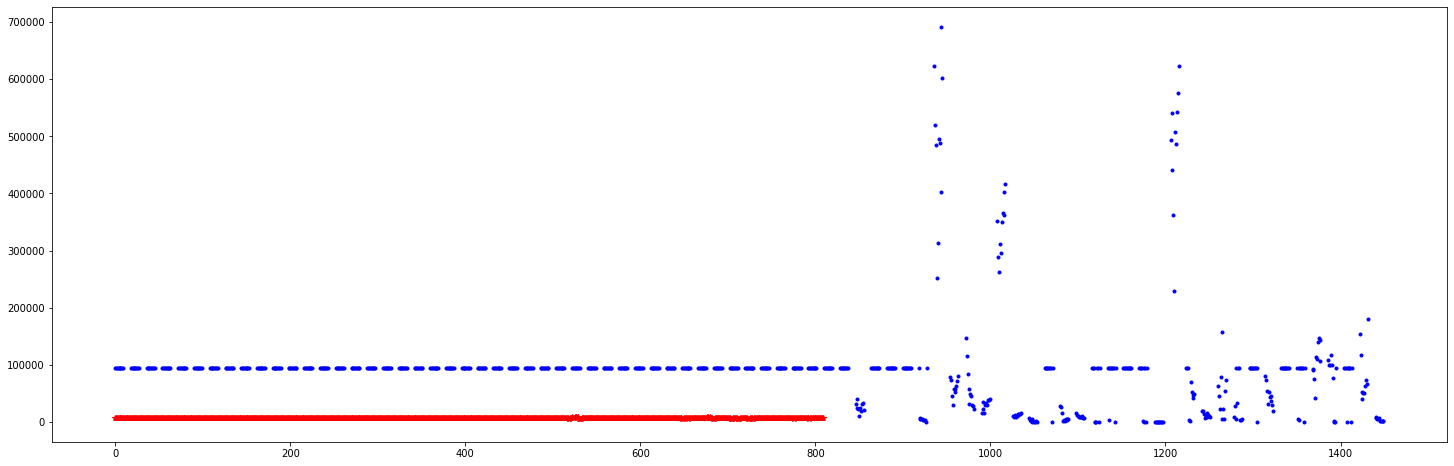

In [70]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,8)
plt.plot(lsvr.predict(X_train), "r*")
plt.plot(y_train, "b.")

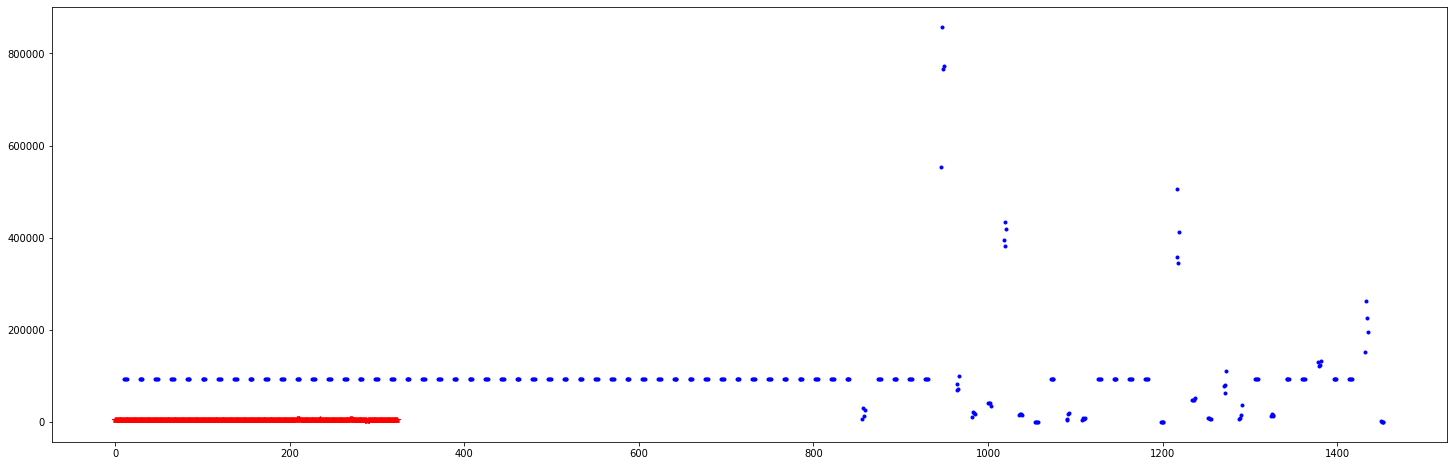

In [71]:
plt.plot(lsvr.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lr.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(lr.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(lr.score(X_test, y_test)))

Accuracy on the training subset: 0.991
Accuracy on the test subset: -420678287676963284844544.000
Accuracy on the test subset: -2480051852601482058661888.000


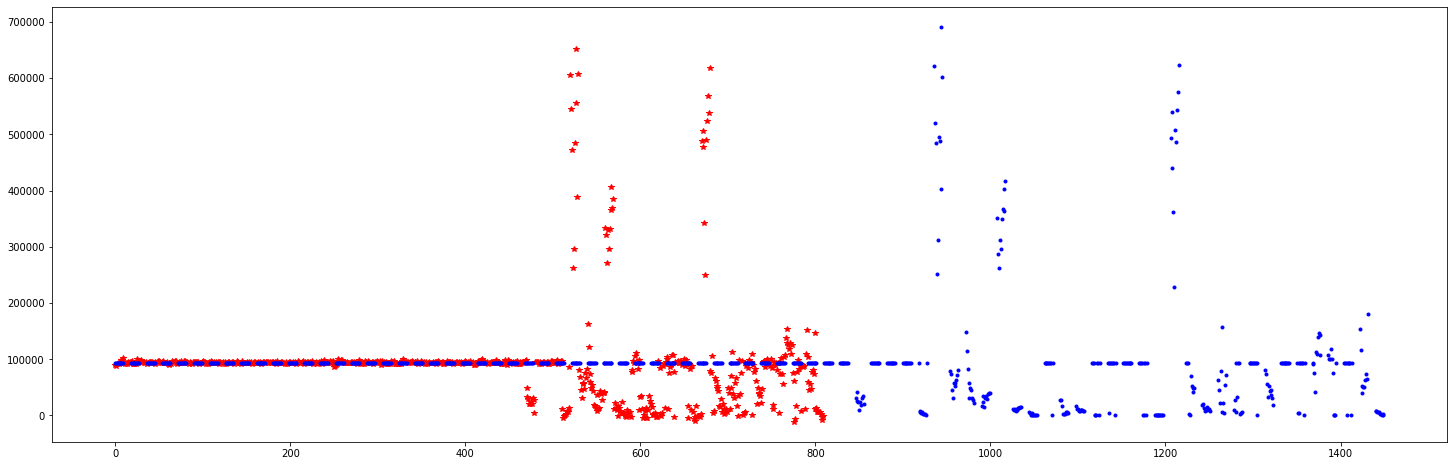

In [73]:

plt.plot(lr.predict(X_train), "r*")
plt.plot(y_train, "b.")

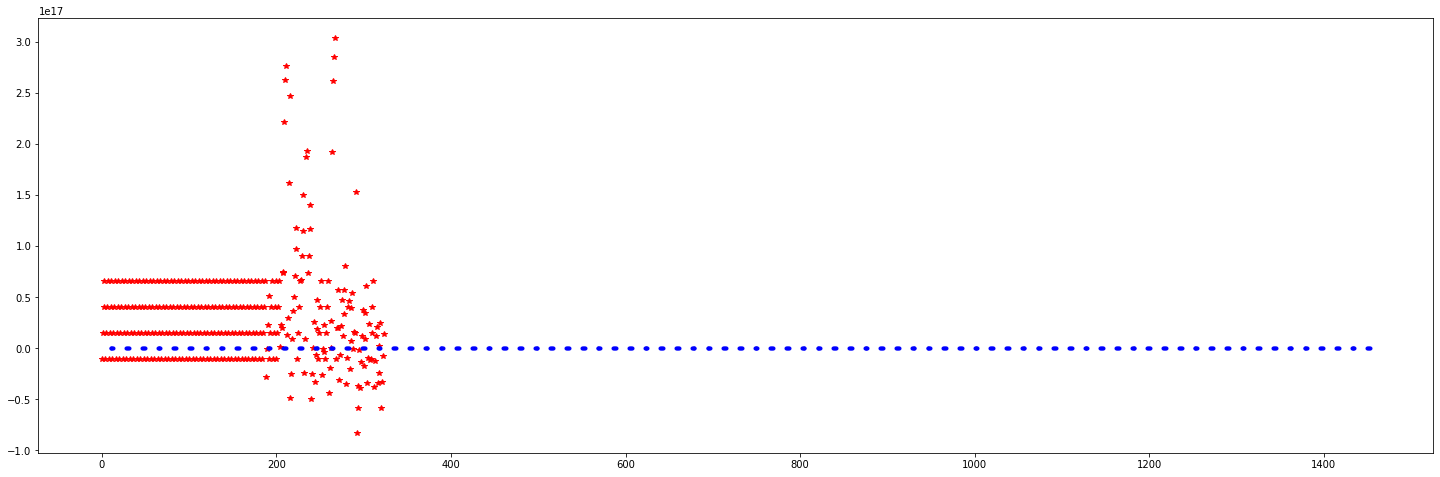

In [74]:
plt.plot(lr.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [77]:
from sklearn.linear_model import OrthogonalMatchingPursuit
reg = OrthogonalMatchingPursuit(normalize=False)

reg.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(reg.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(reg.score(X_test, y_test)))

Accuracy on the training subset: 0.496
Accuracy on the test subset: 0.413
Accuracy on the test subset: 0.371


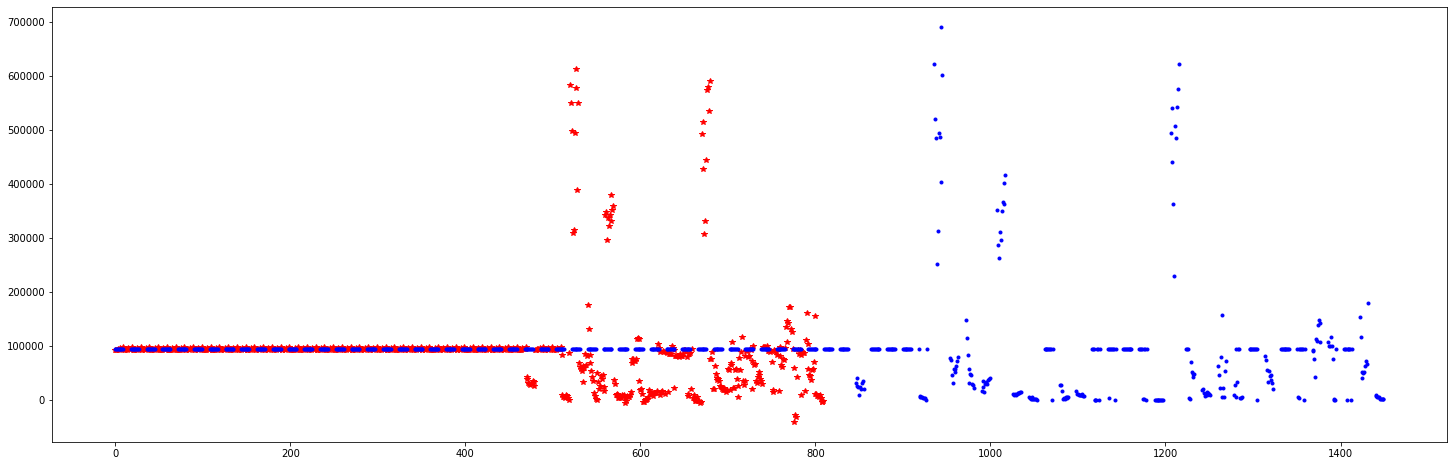

In [76]:
plt.plot(reg.predict(X_train), "r*")
plt.plot(y_train, "b.")

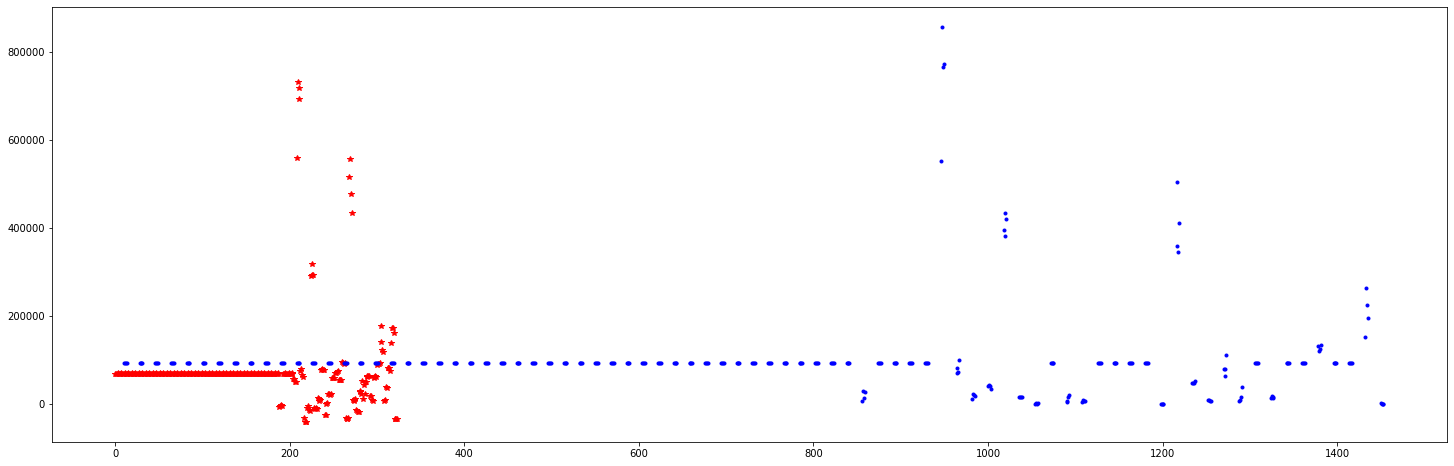

In [77]:
plt.plot(reg.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(xgb_model.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(xgb_model.score(X_test, y_test)))

[11:06:47] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:47] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy on the training subset: 1.000
Accuracy on the val subset: 0.894
Accuracy on the test subset: 0.883


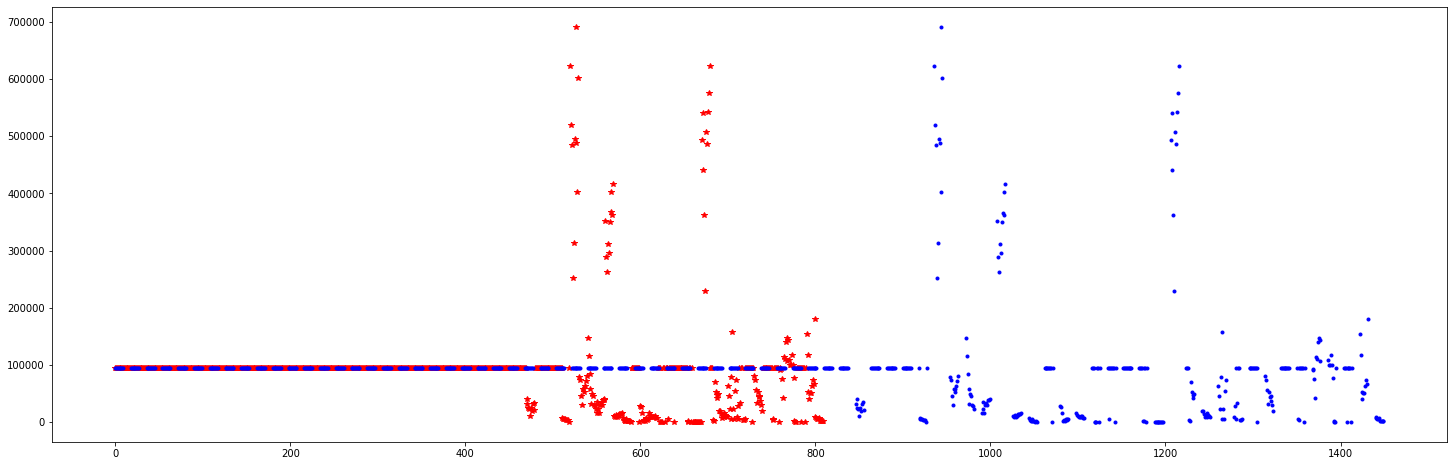

In [79]:
plt.plot(xgb_model.predict(X_train),"r*")
plt.plot(y_train, "b.")

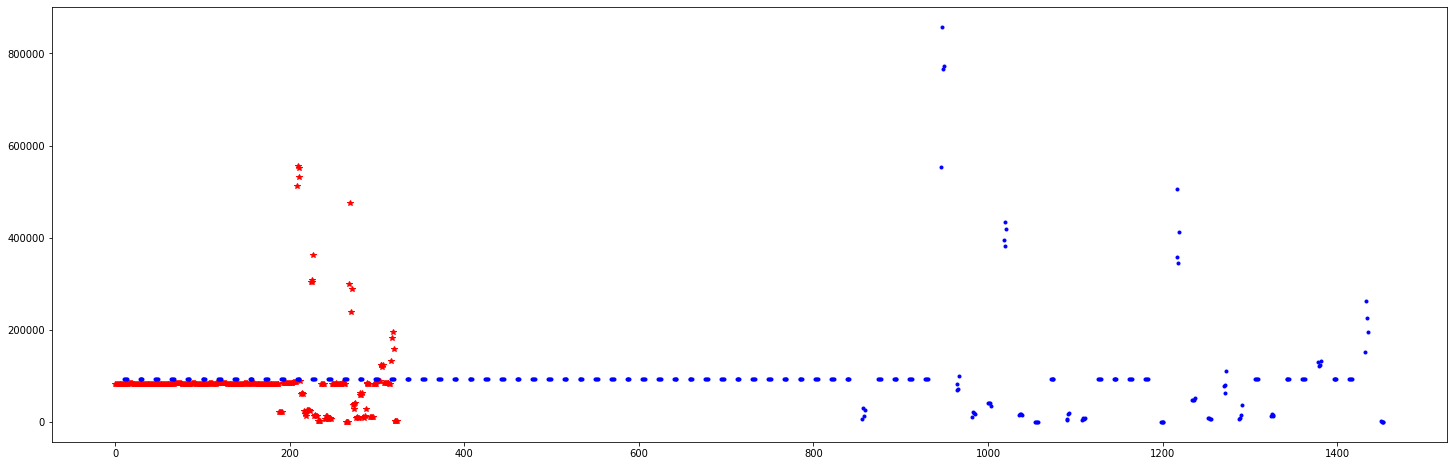

In [80]:
plt.plot(xgb_model.predict(X_val),"r*")
plt.plot(y_val, "b.")

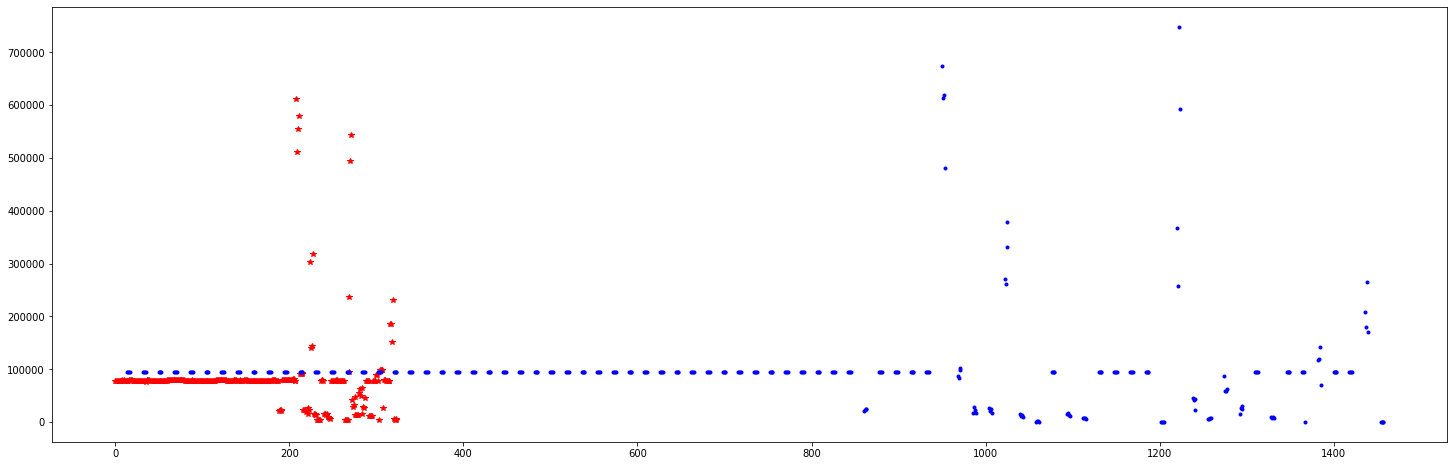

In [81]:
plt.plot(xgb_model.predict(X_test),"r*")
plt.plot(y_test, "b.")

In [82]:
from lightgbm import LGBMRegressor

lxgb = LGBMRegressor(random_state=42)
lxgb.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lxgb.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(lxgb.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(lxgb.score(X_test, y_test)))

Accuracy on the training subset: 0.978
Accuracy on the val subset: 0.820
Accuracy on the test subset: 0.816


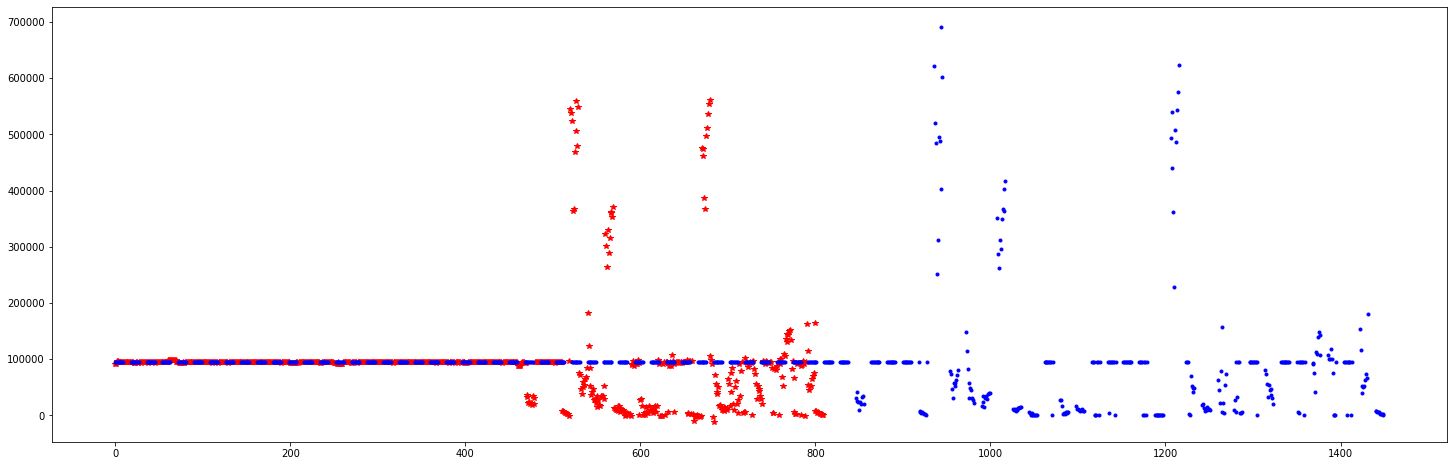

In [83]:
plt.plot(lxgb.predict(X_train),"r*")
plt.plot(y_train, "b.")

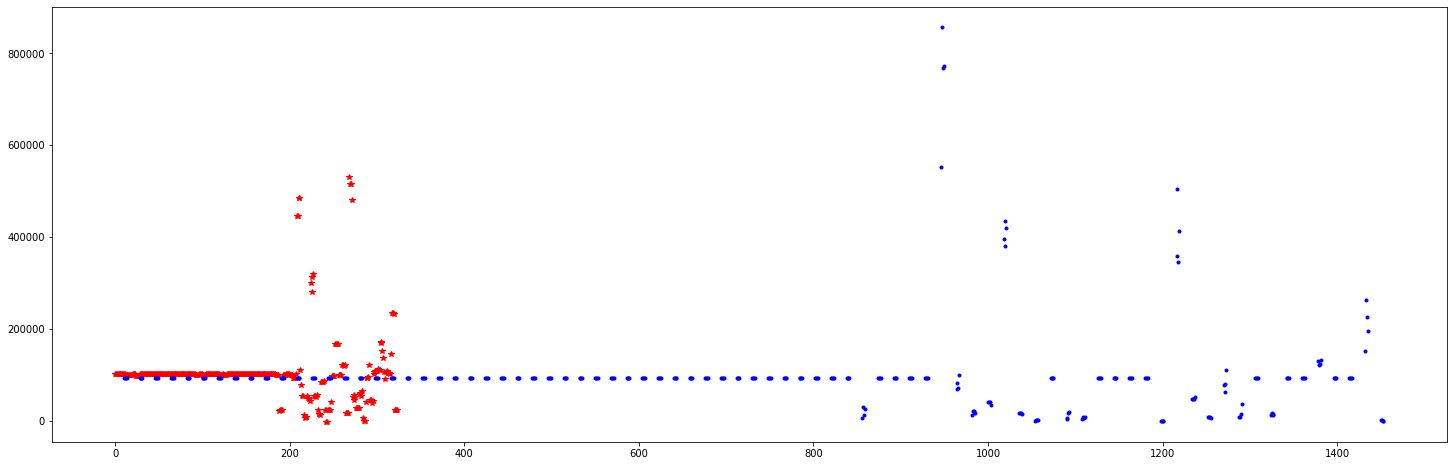

In [84]:
plt.plot(lxgb.predict(X_val),"r*")
plt.plot(y_val, "b.")

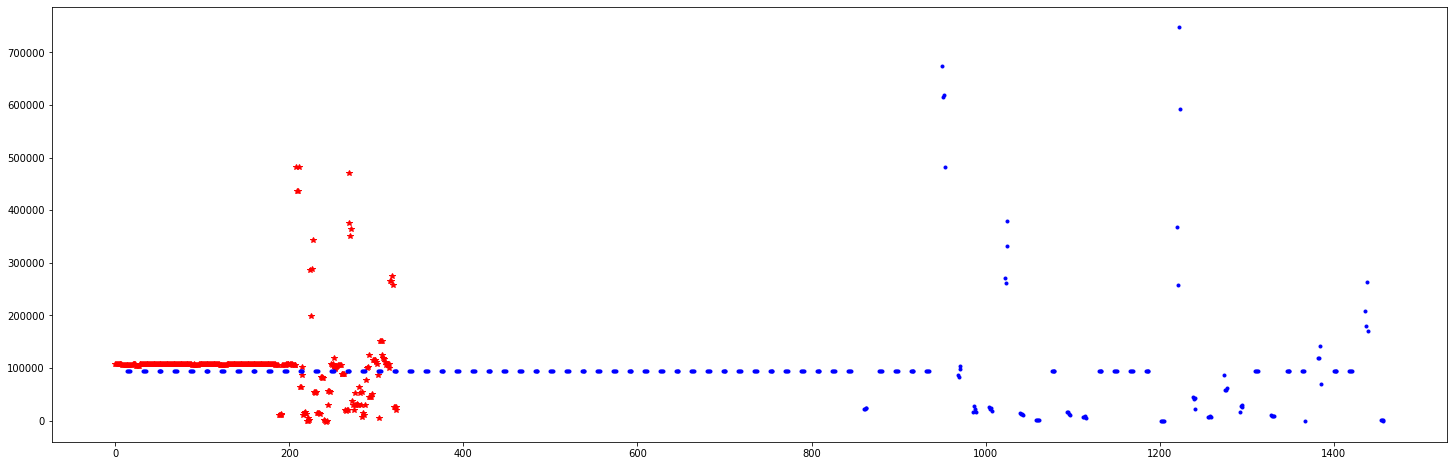

In [85]:
plt.plot(lxgb.predict(X_test),"r*")
plt.plot(y_test, "b.")

In [97]:
from sklearn.cross_decomposition import PLSRegression

pls4 = PLSRegression(n_components=4)

pls4.fit(X_train, y_train)


print('Accuracy on the training subset: {:.3f}'.format(pls4.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(pls4.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(pls4.score(X_test, y_test)))

Accuracy on the training subset: 0.950
Accuracy on the val subset: 0.742
Accuracy on the test subset: 0.832


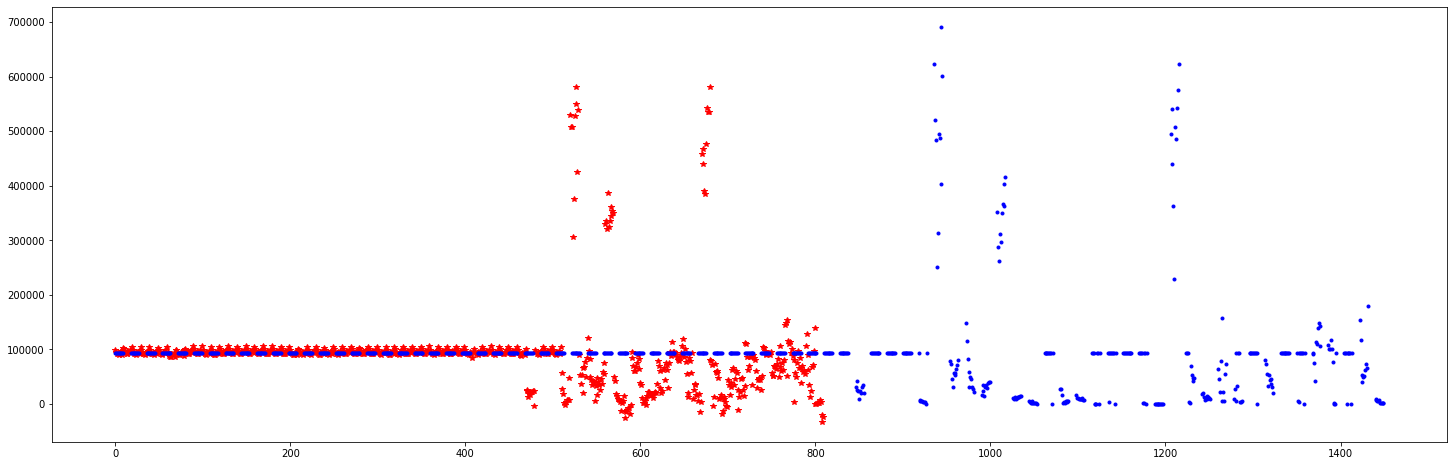

In [98]:
plt.plot(pls4.predict(X_train),"r*")
plt.plot(y_train, "b.")

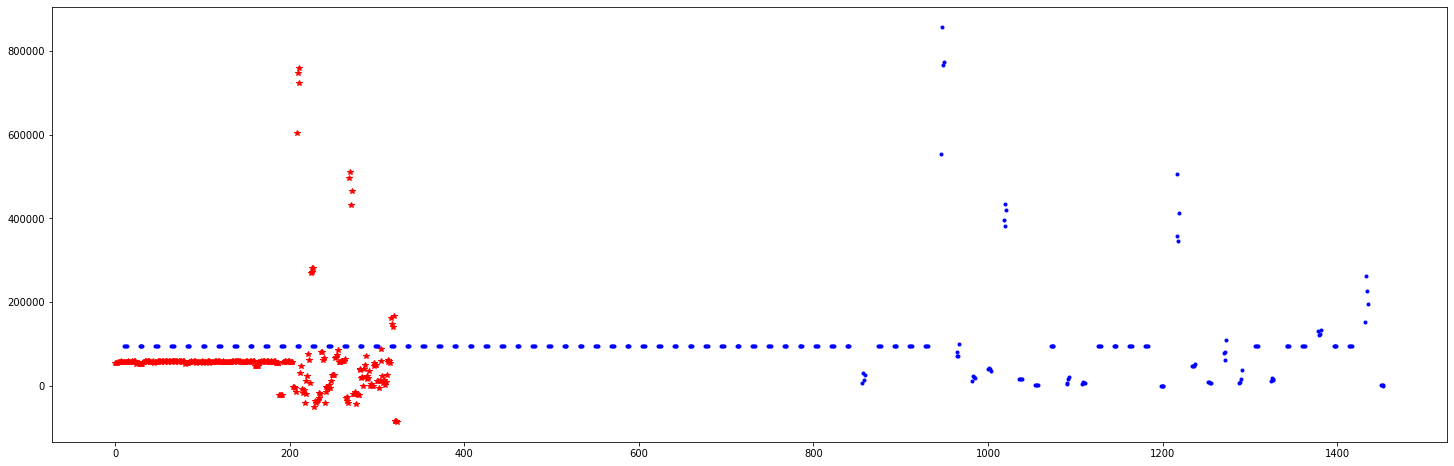

In [99]:
plt.plot(pls4.predict(X_val),"r*")
plt.plot(y_val, "b.")

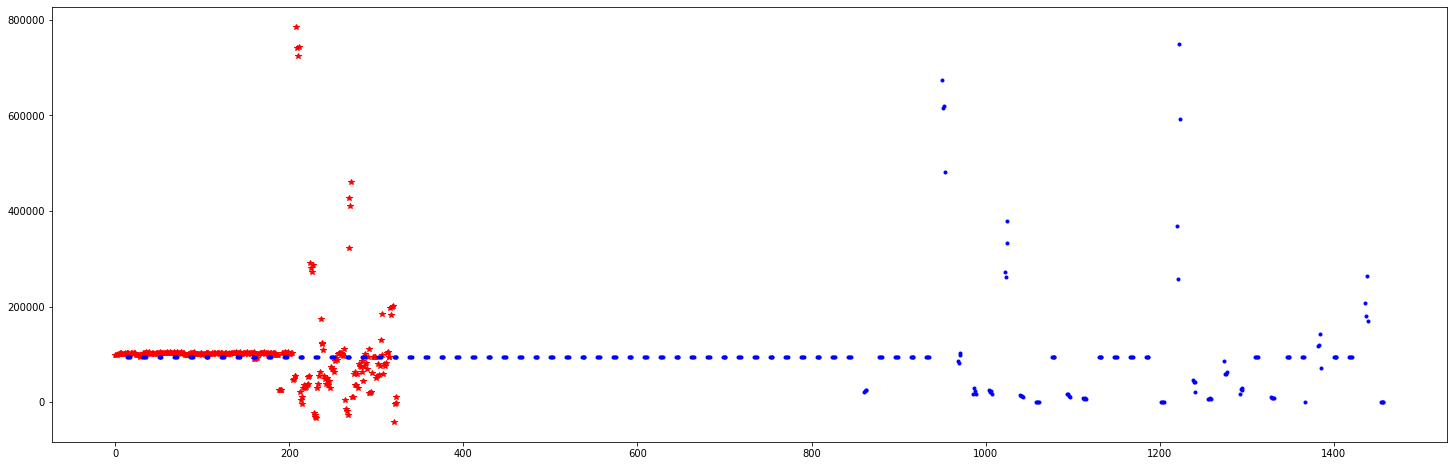

In [100]:
plt.plot(pls4.predict(X_test),"r*")
plt.plot(y_test, "b.")

In [102]:
from sklearn import linear_model

ardr = linear_model.ARDRegression()
ardr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(ardr.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(ardr.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(ardr.score(X_test, y_test)))

Accuracy on the training subset: 0.962
Accuracy on the val subset: 0.950
Accuracy on the test subset: 0.943


In [103]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(ridge.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(ridge.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(ridge.score(X_test, y_test)))

Accuracy on the training subset: 0.970
Accuracy on the val subset: 0.706
Accuracy on the test subset: 0.888


In [104]:
ridgecv = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridgecv.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(ridgecv.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(ridgecv.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(ridgecv.score(X_test, y_test)))

Accuracy on the training subset: 0.990
Accuracy on the val subset: 0.720
Accuracy on the test subset: -1.671


In [109]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lasso.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(lasso.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(lasso.score(X_test, y_test)))

Accuracy on the training subset: 0.990
Accuracy on the val subset: 0.525
Accuracy on the test subset: -1.844


In [107]:
lassocv = linear_model.LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1])
lassocv.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lassocv.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(lassocv.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(lassocv.score(X_test, y_test)))

Accuracy on the training subset: 0.990
Accuracy on the val subset: 0.525
Accuracy on the test subset: -1.844


In [113]:
enet = linear_model.ElasticNet(alpha = 0.1, l1_ratio=0.7)
enet.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(enet.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(enet.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(enet.score(X_test, y_test)))

Accuracy on the training subset: 0.829
Accuracy on the val subset: 0.770
Accuracy on the test subset: 0.777


In [120]:
ll = linear_model.LassoLars()
ll.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(ll.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(ll.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(ll.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the val subset: 0.948
Accuracy on the test subset: -0.069


In [121]:
bari = linear_model.BayesianRidge()
bari.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(bari.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(bari.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(bari.score(X_test, y_test)))

Accuracy on the training subset: 0.990
Accuracy on the val subset: 0.795
Accuracy on the test subset: -1.305


In [122]:
twr0 = linear_model.TweedieRegressor()

twr0.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(twr0.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(twr0.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(twr0.score(X_test, y_test)))

Accuracy on the training subset: 0.143
Accuracy on the val subset: 0.126
Accuracy on the test subset: 0.131


In [123]:
twr1 = linear_model.TweedieRegressor(power=1)

twr1.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(twr1.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(twr1.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(twr1.score(X_test, y_test)))

Accuracy on the training subset: 0.936
Accuracy on the val subset: -1.490
Accuracy on the test subset: -2.230


In [127]:
sgdr = linear_model.SGDRegressor()

sgdr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(sgdr.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(sgdr.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(sgdr.score(X_test, y_test)))

Accuracy on the training subset: 0.955
Accuracy on the val subset: 0.777
Accuracy on the test subset: 0.885


In [128]:
par = linear_model.PassiveAggressiveRegressor()

par.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(par.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(par.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(par.score(X_test, y_test)))

Accuracy on the training subset: 0.405
Accuracy on the val subset: 0.259
Accuracy on the test subset: 0.164


In [131]:
theilsen = linear_model.TheilSenRegressor(random_state=42)

theilsen.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(theilsen.score(X_train, y_train)))
print('Accuracy on the val subset: {:.3f}'.format(theilsen.score(X_val, y_val)))
print('Accuracy on the test subset: {:.3f}'.format(theilsen.score(X_test, y_test)))

Accuracy on the training subset: 0.978
Accuracy on the val subset: 0.481
Accuracy on the test subset: 0.868
